In [1]:
import sys
sys.path.insert(1, '/home/msantolaria/Documents/MyPythonLibrary/ClimAnag/')
import climbasis as climb
from climbasis import *
import domain as dom
import myplot
import glob
from eofs.xarray import Eof
from myplot import *
import obsinfo as obs
from obsinfo import *



source='/home/msantolaria/Documents/MyResearch/AnalysisObservations/'
resultsDir=source + 'Results/'
plotsDir=source + 'Plots/'

sourceData='/home/msantolaria/Documents/Data/'


iyr=1960
fyr=2014

domain='NINO34'
season='SON'
#season=sys.argv[1]
exp='obs'

data='HadISST'
model='HadISST'
variable='sst'
info=obs.get_obs(variable,data)

print(info)
fileName=info.get('filename')
ds_fill= xr.open_dataset(sourceData+data+'/'+fileName)
# replace all values equal to -1000 with np.nan
ds = ds_fill[variable].where(ds_fill[variable] != -1000.)
lat,lon=climb.latlon(ds)
ylat=ds.coords[lat]
xlon=ds.coords[lon]
unit=ds.units

field=dom.field_dom(ds,domain)

if season[0]=='m':
    rmon=int(season.split('mon')[1])
    vals,anoms=climb.monthly_selection(field,rmon,iyr,fyr)
else:
    vals,anoms=climb.seasonal_selection(field,season,iyr,fyr)

###
##Detrended anomalies
###
anoms_detrend=climb.detrend_dim(vals, 'time', deg=2)
#anoms_detrend_lin=climb.detrend_dim(vals, 'time', deg=1)
###
##Clim and std dev
###
clim=vals.mean('time')
std=anoms.std('time')

std_det=anoms_detrend.std('time')
#std_det_lin=anoms_detrend_lin.std('time')
anoms_norm=anoms_detrend/std_det


Need to fill values
ds = ds0[variable].where(ds0[variable] != -1000.)
{'var': 'sst', 'filename': 'HadISST_sst_v1.1_187001_202105.nc', 'units': 'degrees celsius', 'gridlon': '-180_180', 'gridlat': '90_-90'}
{'var': 'sst', 'filename': 'HadISST_sst_v1.1_187001_202105.nc', 'units': 'degrees celsius', 'gridlon': '-180_180', 'gridlat': '90_-90'}


In [2]:

##Computing time series of seasonal spatial average ----------------------------
#print('Computing time series of seasonal spatial average')
ts_season=climb.spatial_average(anoms)
ts_season_det=climb.spatial_average(anoms_detrend)
#plotnameTs='timeseries_anoms_'+variable+'_'+model+'_'+exp+'_'+domain+'_'+season+'_'+str(iyr)+'-'+str(fyr)
#np.savetxt(resultsDir+plotnameTs+'.txt',ts_season)
#print('saving .txt at',resultsDir+plotnameTs)

print('Computing time series of seasonal spatial average')
ts_season_norm=climb.spatial_average(anoms_norm)
plotnameTs='timeseries_anoms_norm_'+variable+'_'+model+'_'+exp+'_'+domain+'_'+season+'_'+str(iyr)+'-'+str(fyr)
np.savetxt(resultsDir+plotnameTs+'.txt',ts_season_norm)
print('saving .txt at',resultsDir+plotnameTs)


Computing time series of seasonal spatial average
saving .txt at /home/msantolaria/Documents/MyResearch/AnalysisObservations/Results/timeseries_anoms_norm_sst_HadISST_obs_NINO34_SON_1960-2014


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54] [1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973
 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014]


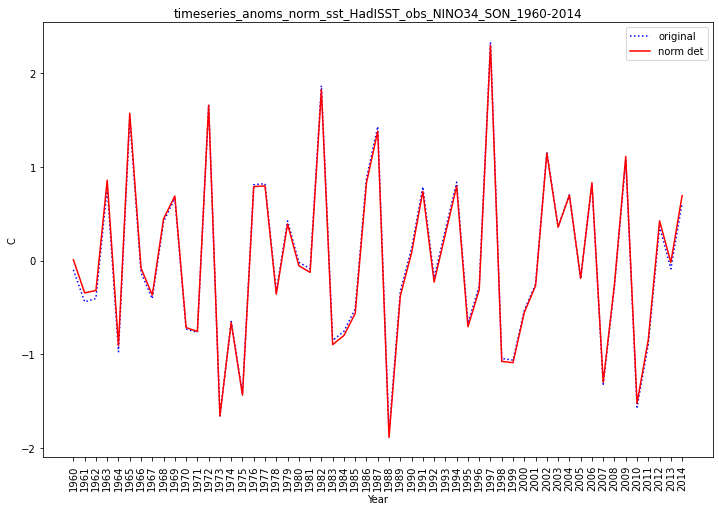

save at /home/msantolaria/Documents/MyResearch/AnalysisObservations/Results/ timeseries_anoms_norm_sst_HadISST_obs_NINO34_SON_1960-2014


In [3]:
##Trends---------------------------------------
xd=np.arange(0,len(ts_season_norm),1)
#par=stats.linregress(xd,ts_season)

fig, ax = plt.subplots(figsize=(12, 8))
my_ticks=xd+iyr
print(xd,my_ticks)
ticks=np.arange(iyr,fyr+1,1)
#ax.plot(xd,ts_season,color='b', linewidth=2)
ax.plot(xd, ts_season, 'b:',label='original')
ax.plot(xd,ts_season_det,'red',label='norm det')

#ax.axhline(0, color='k')
#ax.set_ylim(0, 3)
ax.set_xlabel('Year')
ax.set_ylabel('%s'%(ds.units))
ax.set_title(plotnameTs)
freq=5
plt.xticks(xd,my_ticks, rotation='vertical')
plt.legend()
plt.savefig(plotsDir+plotnameTs+'.png',format='png',bbox_inches='tight')
plt.show()
print('save at', resultsDir,plotnameTs)

In [5]:
dsR=dom.shifting_grid_ALLOW(ds)

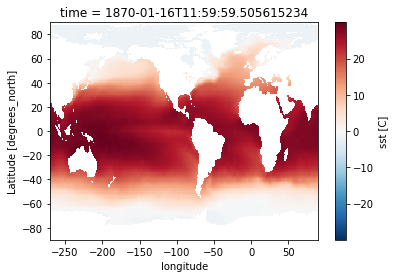

In [6]:
dsR[0,:,:].plot()

In [7]:
latS=-15;latN=15;lonW=-260;lonE=-100

In [8]:
latlim=slice(latN,latS);lonlim=slice(lonW,lonE)

In [13]:
field=dsR.sel(latitude=latlim,longitude=lonlim)

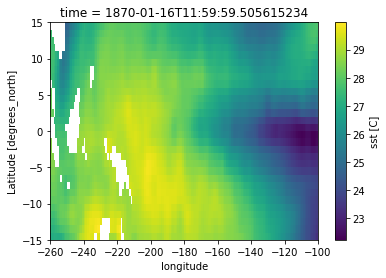

In [15]:
field[0,:,:].plot()

In [18]:
dom.shifting_grid_ALLOWback(field[0,:,:]).longitude

<xarray.DataArray 'longitude' (longitude: 160)>
array([-179.5, -178.5, -177.5, -176.5, -175.5, -174.5, -173.5, -172.5, -171.5,
       -170.5, -169.5, -168.5, -167.5, -166.5, -165.5, -164.5, -163.5, -162.5,
       -161.5, -160.5, -159.5, -158.5, -157.5, -156.5, -155.5, -154.5, -153.5,
       -152.5, -151.5, -150.5, -149.5, -148.5, -147.5, -146.5, -145.5, -144.5,
       -143.5, -142.5, -141.5, -140.5, -139.5, -138.5, -137.5, -136.5, -135.5,
       -134.5, -133.5, -132.5, -131.5, -130.5, -129.5, -128.5, -127.5, -126.5,
       -125.5, -124.5, -123.5, -122.5, -121.5, -120.5, -119.5, -118.5, -117.5,
       -116.5, -115.5, -114.5, -113.5, -112.5, -111.5, -110.5, -109.5, -108.5,
       -107.5, -106.5, -105.5, -104.5, -103.5, -102.5, -101.5, -100.5,  100.5,
        101.5,  102.5,  103.5,  104.5,  105.5,  106.5,  107.5,  108.5,  109.5,
        110.5,  111.5,  112.5,  113.5,  114.5,  115.5,  116.5,  117.5,  118.5,
        119.5,  120.5,  121.5,  122.5,  123.5,  124.5,  125.5,  126.5,  127.5,
        128.5,  129.5,  130.5,  131.5,  132.5,  133.5,  134.5,  135.5,  136.5,
        137.5,  138.5,  139.5,  140.5,  141.5,  142.5,  143.5,  144.5,  145.5,
        146.5,  147.5,  148.5,  149.5,  150.5,  151.5,  152.5,  153.5,  154.5,
        155.5,  156.5,  157.5,  158.5,  159.5,  160.5,  161.5,  162.5,  163.5,
        164.5,  165.5,  166.5,  167.5,  168.5,  169.5,  170.5,  171.5,  172.5,
        173.5,  174.5,  175.5,  176.5,  177.5,  178.5,  179.5], dtype=float32)
Coordinates:
    time       datetime64[ns] 1870-01-16T11:59:59.505615234
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5